In [1]:
from Core.mars_index import ImageIndex
from Core.mars_plotter import MapPlotter

index = ImageIndex()
plotter = MapPlotter()

RDRCUMINDEX.TAB already exists. Set `reload = True` to force download.
RDRCUMINDEX.LBL already exists. Set `reload = True` to force download.
DATASET SIZE ......................................... 100362 images


In [2]:
# Apply various filters in sequence
index.latitude_filter();
index.scale_filter();
index.season_filter();
index.density_filter();
index.keyword_filter();
index.temporal_filter();
index.alignment_filter();

LATITUDE FILTER ........................................ 6881 images
SCALE FILTER ........................................... 4049 images
SEASON FILTER .......................................... 2284 images
CLUSTER FILTER ......................................... 1646 images
KEYWORD FILTER .......................................... 371 images
YEAR FILTER ............................................. 349 images
ALLIGNMENT FILTER ....................................... 214 images


Visualizing cluster ID: 53


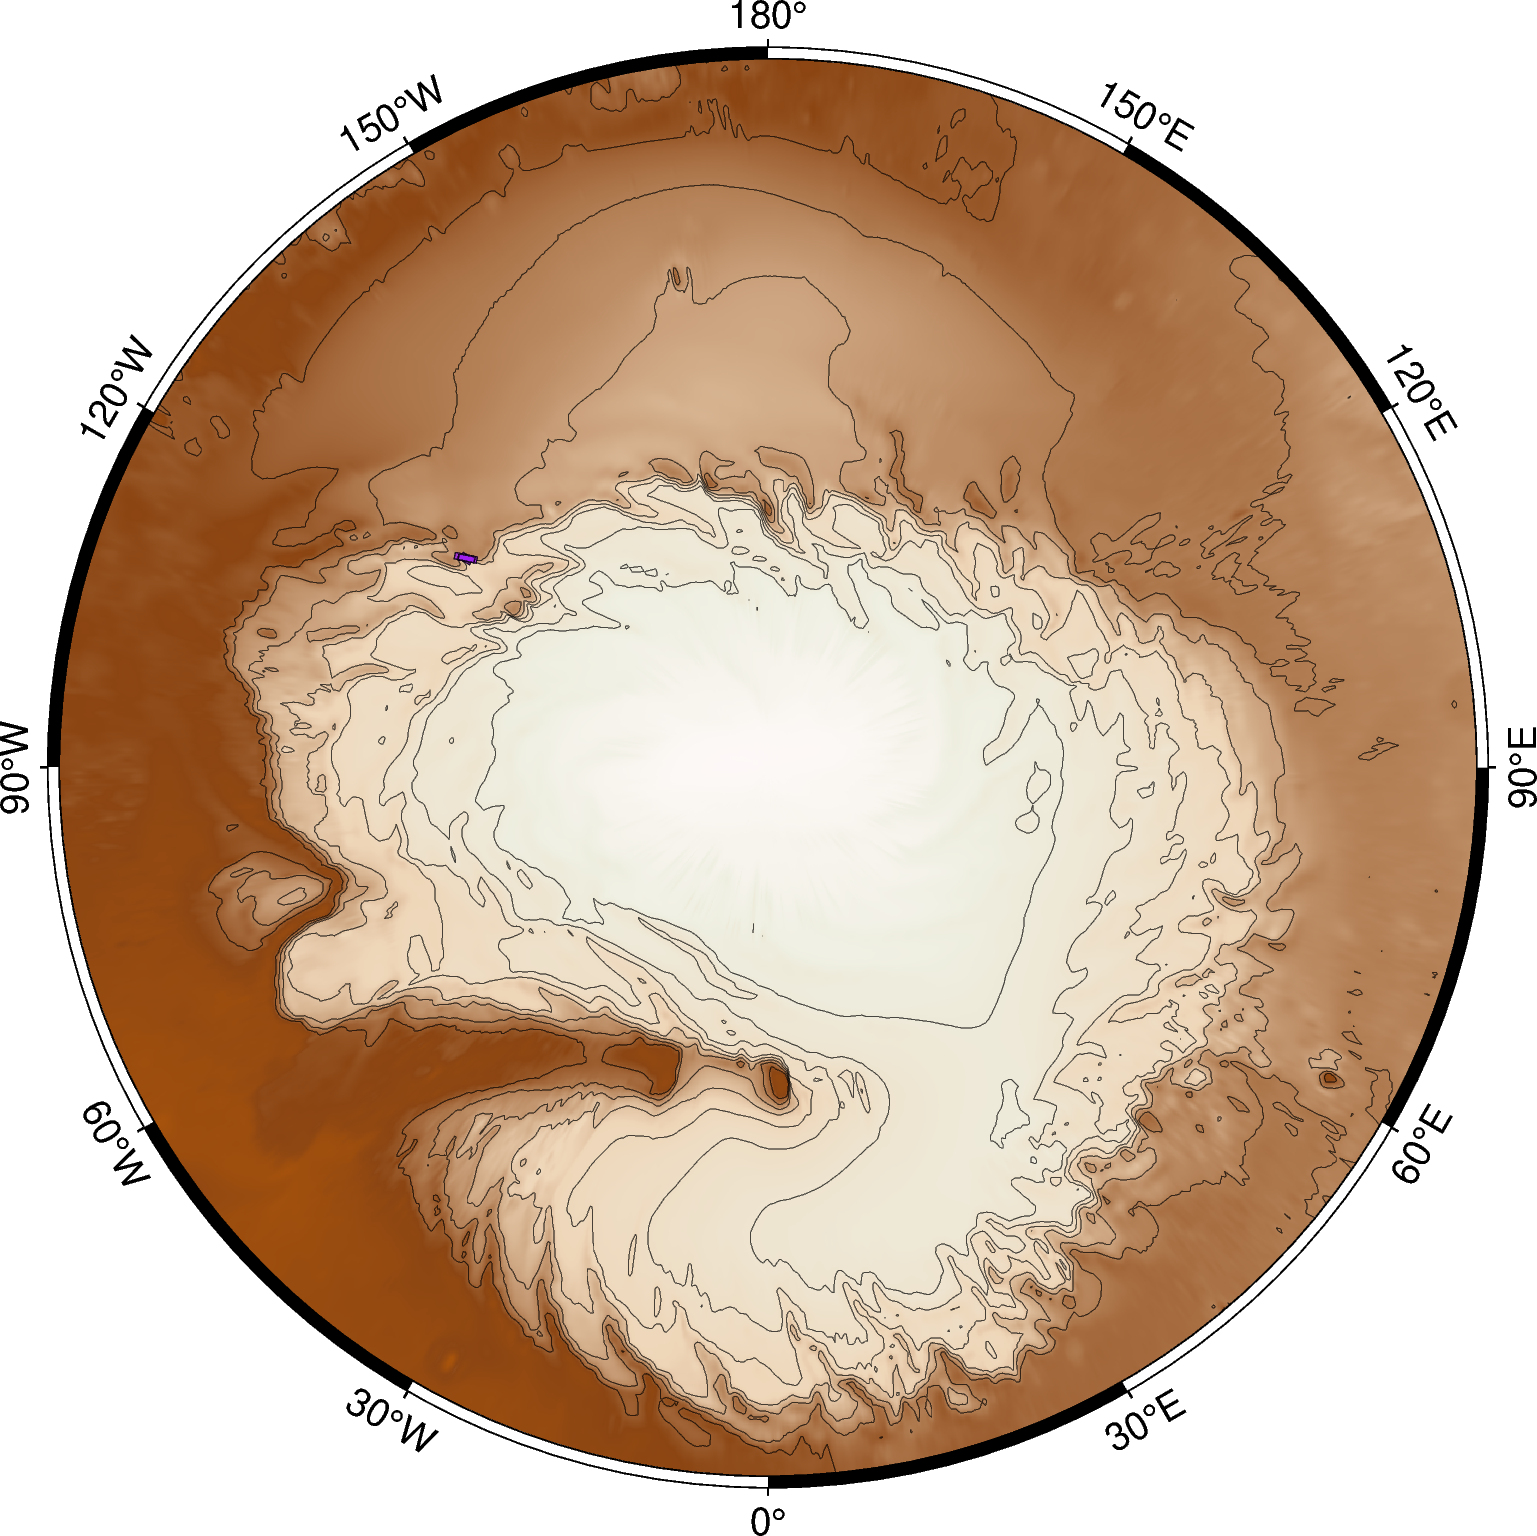

In [3]:
# Choose a cluster to visualize & download
df = index.df
cIDs = df.CLUSTER.unique()

print(f"Visualizing cluster ID: {cIDs[6]}")
plotter.visualize(df[df.CLUSTER == cIDs[6] ], target='img_rectangle', engine='pygmt')

In [ ]:
# Display local configuration and save the filtered dataframe
print(index.local_conf)
index.save_df()

{'latitude_filter': {'min_lat': 78}, 'scale_filter': {'scale': 0.25}, 'season_filter': {'season': 'Northern summer'}, 'cluster_filter': {'min_samples': 2, 'epsilon': 2000}, 'keyword_filter': {'keywords': ['scarp']}, 'my_filter': {'min_years': 2, 'mys': [], 'consecutive': False}, 'alignment_filter': {}}


In [ ]:
# Download images from a specific cluster
index.download_images(cluster_id = 48, reload = True)

100%|██████████| 896M/896M [04:36<00:00, 3.24MiB/s] 


PSP_001550_2640_RED.JP2 downloaded successfully.


100%|██████████| 1.23G/1.23G [05:50<00:00, 3.50MiB/s]


PSP_009052_2640_RED.JP2 downloaded successfully.


100%|██████████| 747M/747M [03:17<00:00, 3.78MiB/s] 


ESP_053648_2640_RED.JP2 downloaded successfully.


100%|██████████| 604M/604M [02:50<00:00, 3.54MiB/s] 

ESP_080868_2640_RED.JP2 downloaded successfully.
